In [24]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 0 ns (started: 2022-08-03 15:26:28 +05:30)


In [25]:
!pip install numpy matplotlib tqdm scipy seaborn rich pandas bokeh


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
time: 1.75 s (started: 2022-08-03 15:26:29 +05:30)


In [26]:
def sbox(inp):
    s =  [0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67,
            0x2b, 0xfe, 0xd7, 0xab, 0x76, 0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59,
            0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0, 0xb7,
            0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1,
            0x71, 0xd8, 0x31, 0x15, 0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05,
            0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75, 0x09, 0x83,
            0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29,
            0xe3, 0x2f, 0x84, 0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b,
            0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf, 0xd0, 0xef, 0xaa,
            0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c,
            0x9f, 0xa8, 0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc,
            0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2, 0xcd, 0x0c, 0x13, 0xec,
            0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19,
            0x73, 0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee,
            0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb, 0xe0, 0x32, 0x3a, 0x0a, 0x49,
            0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
            0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4,
            0xea, 0x65, 0x7a, 0xae, 0x08, 0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6,
            0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a, 0x70,
            0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9,
            0x86, 0xc1, 0x1d, 0x9e, 0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e,
            0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf, 0x8c, 0xa1,
            0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0,
            0x54, 0xbb, 0x16]
    return s[inp]

def invsbox(inp):
    s = [0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3,
            0x9e, 0x81, 0xf3, 0xd7, 0xfb , 0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f,
            0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb , 0x54,
            0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b,
            0x42, 0xfa, 0xc3, 0x4e , 0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24,
            0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25 , 0x72, 0xf8,
            0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d,
            0x65, 0xb6, 0x92 , 0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda,
            0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84 , 0x90, 0xd8, 0xab,
            0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3,
            0x45, 0x06 , 0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1,
            0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b , 0x3a, 0x91, 0x11, 0x41,
            0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6,
            0x73 , 0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9,
            0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e , 0x47, 0xf1, 0x1a, 0x71, 0x1d,
            0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b ,
            0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0,
            0xfe, 0x78, 0xcd, 0x5a, 0xf4 , 0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07,
            0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f , 0x60,
            0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f,
            0x93, 0xc9, 0x9c, 0xef , 0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5,
            0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61 , 0x17, 0x2b,
            0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55,
            0x21, 0x0c, 0x7d]
    return s[inp]

def intermediate(pt, keyguess):
    return invsbox(pt ^ keyguess)

HW = [bin(n).count("1") for n in range(0, 256)]

time: 16 ms (started: 2022-08-03 15:26:47 +05:30)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange
from scipy.stats import linregress
import seaborn as sns
import time
import rich as r
import pandas as pd
from IPython.display import clear_output # type: ignore
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import brewer

#known_keys = np.load('trace_177/known_keys.npy')
textin_array = np.load('trace_177/textin_array.npy')
trace_array = np.load('trace_177/trace_array.npy')
textout_array = np.load('trace_177/textout_array.npy')

#print(known_keys.shape)
print(textin_array.shape)
print(textout_array.shape)
print(trace_array.shape)

(1000, 16)
(1000, 16)
(1000, 12000)
time: 63 ms (started: 2022-08-03 15:26:58 +05:30)


In [28]:
output_notebook()
p = figure(plot_width=1000, plot_height=400)
p.line(range(len(trace_array[0])),trace_array[0])

show(p)

Loading BokehJS ...

time: 78 ms (started: 2022-08-03 15:27:01 +05:30)


# DOM Attack

In [29]:
mean_diffs = np.zeros(256)
key_guess = []
# numtraces = trace_array.shape[0]
numtraces = 500    # number of traces to use

for subkey in tnrange(0, 16, desc="Total Progress"):
    for kguess in tnrange(256, desc=f"Attacking Subkey {subkey}", leave=False):
        one_list = []
        zero_list = []

        for trace_no in range(numtraces):
            if (intermediate(textout_array[trace_no][subkey], kguess) & 1):
                one_list.append(trace_array[trace_no])
            else:
                zero_list.append(trace_array[trace_no])

        one_avg = np.asarray(one_list).mean(axis=0)
        zero_avg = np.asarray(zero_list).mean(axis=0)
        mean_diffs[kguess] = np.max(abs(one_avg - zero_avg))

    guess = np.argsort(mean_diffs)[-1]
    key_guess.append(guess)
    clear_output(wait=True)
    display(key_guess)

# [41, 214, 225, 202, 173, 88, 173, 71, 14, 46, 66, 6, 184, 104, 198, 50]

[104, 14, 251, 213, 119, 2, 25, 229, 166, 105, 177, 99, 219, 123, 3, 36]

time: 1min 14s (started: 2022-08-03 15:27:18 +05:30)


In [2]:
# Printing in hex
#print("guess: ", [hex(x)[2:] for x in key_guess])
#print("actual: ", [hex(x)[2:] for x in known_keys[0]])

In [31]:
# For styling the output only

fmt = "{:02X}<br>{:.3f}"
def format_stat(stat):
    return str(fmt.format(stat[0], stat[1]))

def color_corr_key(row):
    # print(len(row))
    ret = [""] * len(row)
    for i, bnum in enumerate(row):
        if i == 0:
            ret[i] = "color: green"
        else:
            ret[i] = "color: red"
    return ret

time: 16 ms (started: 2022-08-03 15:29:31 +05:30)


In [32]:
mean_diffs = np.zeros(256)
key_guess = []
numtraces = trace_array.shape[0]
# numtraces = 350
plots = []
printable = []

for subkey in tnrange(0, 16, desc="Total Progress"):
    temp = []  # to store the keybyte and the dom
    for kguess in tnrange(256, desc=f"Attacking Subkey {subkey}", leave=False):
        one_list = []
        zero_list = []

        for trace_no in range(numtraces):
            if (intermediate(textout_array[trace_no][subkey], kguess) & 1):
                one_list.append(trace_array[trace_no])
            else:
                zero_list.append(trace_array[trace_no])

        one_avg = np.asarray(one_list).mean(axis=0)
        zero_avg = np.asarray(zero_list).mean(axis=0)
        mean_diffs[kguess] = np.max(abs(one_avg - zero_avg))

        temp.append((kguess, mean_diffs[kguess]))  # add the data kguess, dom

 #       if kguess == known_keys[0][subkey]:
            #plots.append(one_avg - zero_avg)

    temp.sort(key = lambda x: -x[1])  # sort temp by dom value
    printable.append(temp)  # add the data in list
    df = pd.DataFrame(printable).transpose()

    guess = np.argsort(mean_diffs)[-1]
    key_guess.append(guess)

    clear_output(wait=True)  # clear the previous output
    display(df.head().style.format(format_stat).apply(color_corr_key, axis=0))  # display the current status

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,580.006,0E0.007,FB0.007,D50.007,370.006,020.006,190.007,E50.008,860.006,690.009,B10.006,630.008,DB0.007,5B0.006,030.007,240.008
1,700.006,F50.004,040.005,830.004,170.005,200.005,790.006,E70.005,1A0.005,4B0.005,640.004,610.005,040.005,780.005,210.006,F30.005
2,850.005,F10.004,260.004,310.004,770.005,040.005,C40.005,780.005,5B0.005,6B0.005,990.004,430.005,F30.005,A40.005,230.005,4F0.005
3,380.005,2C0.004,9B0.004,F50.004,E80.005,240.005,840.005,C70.005,690.005,940.005,B30.004,230.004,060.004,C60.004,DE0.005,FB0.005
4,7A0.005,3E0.004,740.004,140.004,AA0.005,000.005,7B0.005,A40.004,680.005,490.005,4D0.004,4B0.004,F10.004,A60.004,A30.004,070.005


time: 2min 15s (started: 2022-08-03 15:29:43 +05:30)


## Using a better leakage model (Hamming weight)

In [33]:
# mean_diffs = np.zeros(256)
key_guess = []
# numtraces = trace_array.shape[0]
numtraces = 500
plots = []
printable = []
DOM = []

for subkey in tnrange(0, 16, desc="Total Progress"):
    temp = []
    mean_diffs = np.zeros(256)
    for kguess in tnrange(256, desc=f"Attacking Subkey {subkey}", leave=False):
        one_list = []
        zero_list = []

        for trace_no in range(numtraces):
            hw = HW[intermediate(textout_array[trace_no][subkey], kguess)]
            if hw > 4:
                one_list.append(trace_array[trace_no])
            else:
                zero_list.append(trace_array[trace_no])

        one_avg = np.asarray(one_list).mean(axis=0)
        zero_avg = np.asarray(zero_list).mean(axis=0)
        mean_diffs[kguess] = np.max(abs(one_avg - zero_avg))

        temp.append((kguess, mean_diffs[kguess]))  # add the data kguess, dom

       # if kguess == known_keys[0][subkey]:
           # plots.append(one_avg - zero_avg)

    DOM.append(mean_diffs)
    temp.sort(key = lambda x: -x[1])  # sort temp by dom value
    printable.append(temp)  # add the data in list
    df = pd.DataFrame(printable).transpose()

    guess = np.argsort(mean_diffs)[-1]
    key_guess.append(guess)

    clear_output(wait=True)  # clear the previous output
    display(df.head().style.format(format_stat).apply(color_corr_key, axis=0))  # display the current status


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,580.011,0E0.013,FB0.010,D50.011,370.009,020.010,190.012,E50.010,860.011,690.012,B10.010,630.012,DB0.009,5B0.011,030.011,240.012
1,C70.006,810.006,3C0.005,C50.006,B90.005,330.006,840.006,040.006,E60.006,A90.006,1D0.005,090.006,390.006,300.007,9C0.005,470.006
2,D60.006,290.006,AF0.005,D40.005,5C0.005,E00.006,660.005,8E0.006,4F0.005,580.005,250.005,EA0.005,C40.006,BB0.006,620.005,810.006
3,3E0.005,930.005,B10.005,2D0.005,E80.005,000.006,550.005,AB0.005,5D0.005,360.005,D10.005,230.005,AB0.005,C50.006,9F0.005,D30.005
4,620.005,C20.005,770.005,A80.005,C60.005,F50.005,E80.005,9F0.005,4E0.005,E60.005,3E0.005,6E0.005,300.005,FA0.006,1E0.005,A30.005


time: 1min 6s (started: 2022-08-03 15:32:05 +05:30)


In [34]:
num_subkeys = 1
plt.figure(figsize=(20,8))
sns.set_style("whitegrid", {"axes.facecolor": "1"})
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1.5})

for i in range(num_subkeys):
    sns.scatterplot(x=range(1500), y=plots[i][0:1500], alpha=0.5, )

plt.legend(["Subkey {}".format(x) for x in range(num_subkeys)])
plt.title("DOM vs Time for correct Keyguess")
plt.xlabel("Time")
plt.ylabel("Difference of Meam")
plt.show()

IndexError: list index out of range

<Figure size 1440x576 with 0 Axes>

time: 15 ms (started: 2022-08-03 15:33:24 +05:30)


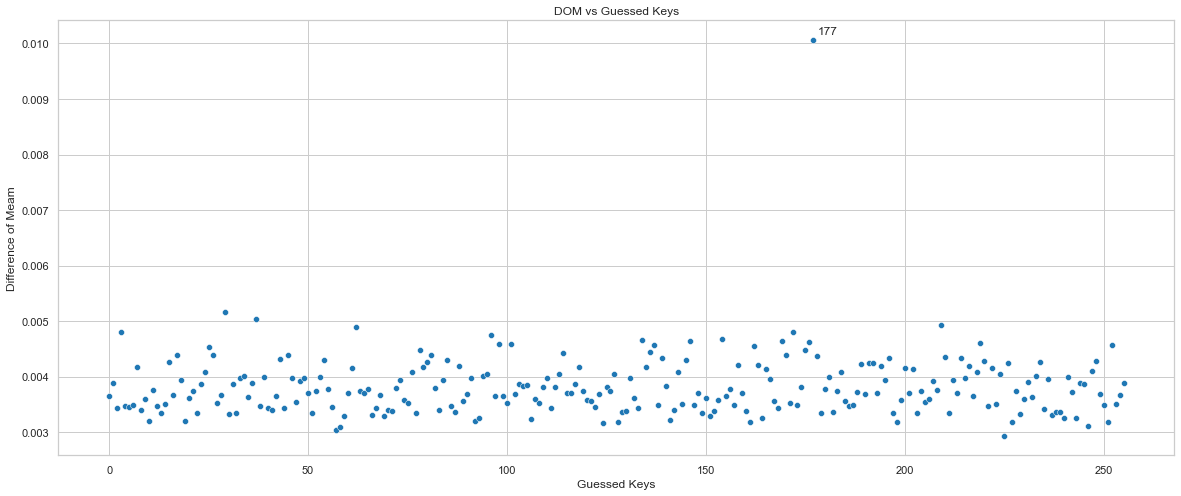

time: 156 ms (started: 2022-08-03 15:33:28 +05:30)


In [35]:
selected_subkey = 10

plt.figure(figsize=(20,8))
sns.scatterplot(x=range(DOM[selected_subkey].shape[0]), y=DOM[selected_subkey])

for i in range(256):
    max_dom = DOM[selected_subkey].max()
    if DOM[selected_subkey][i] == max_dom:
        plt.text(x=i + 1, y=max_dom + 0.0001, s=str(i))

plt.title("DOM vs Guessed Keys")
plt.xlabel("Guessed Keys")
plt.ylabel("Difference of Meam")
plt.show()

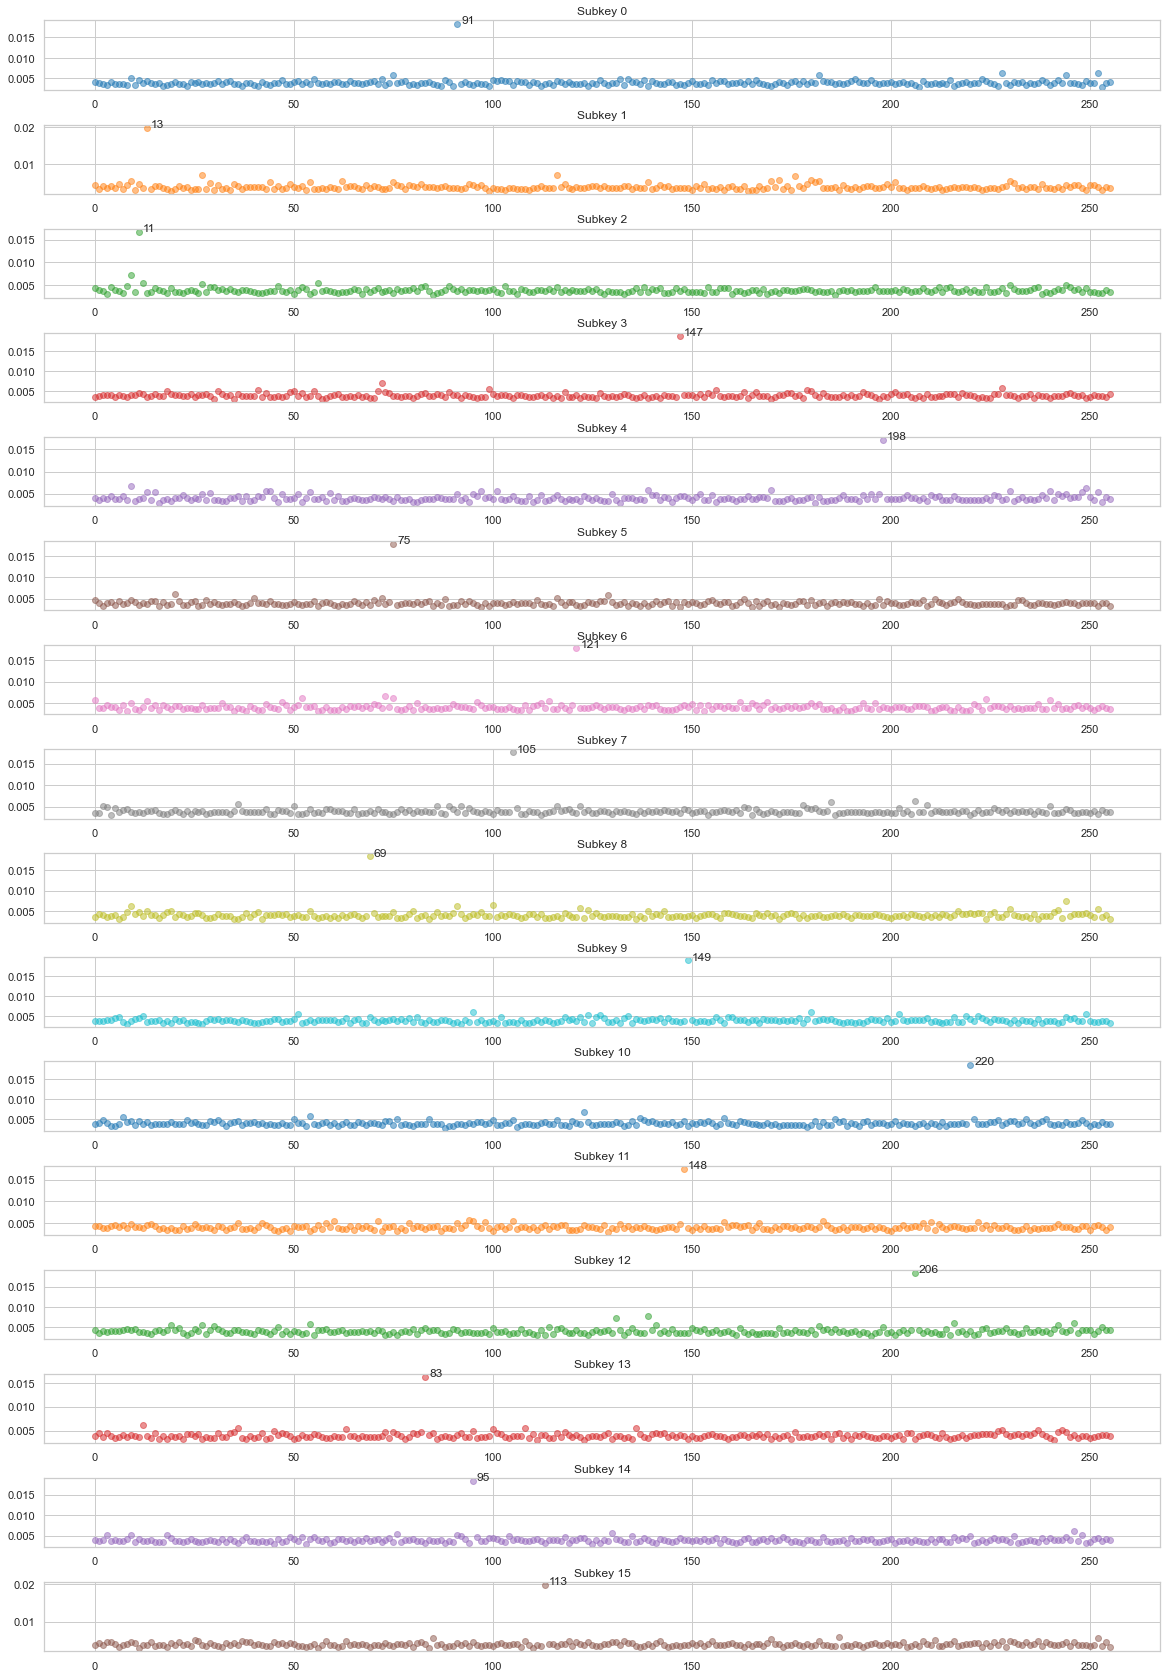

In [23]:
fig, axs = plt.subplots(nrows=16, ncols=1, figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
colors = plt.rcParams["axes.prop_cycle"]()
# fig.suptitle("DOM", fontsize=18, y=0.95)

for _, ax in enumerate(axs):
    c = next(colors)["color"]
    # ax.plot(plots[_][0:1500], alpha=0.5)
    ax.scatter(range(256), y=DOM[_], color=c, alpha=0.5)
    for i in range(256):
        max_dom = DOM[_].max()
        if DOM[_][i] == max_dom:
            ax.text(x=i + 1, y=max_dom + 0.0001, s=str(i))
    ax.set_title("Subkey {}".format(_))
plt.show()

In [36]:
%unload_ext autotime